# **Distribución t-student**

Héctor Manuel Cárdenas Yáñez - A01634615

Resuleve el siguiente problema en Python

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.
Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos.

Pasos que debes de seguir para resolver el problema:

1.- Convierte los datos en un DataFrame. Esto te ayudará a realizar tus cálculos

2.- Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal. Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.

3.- Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales. Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.

4.- En caso de que no sean normales considera que tienen una distribución t-student.

5.- Calcula el intervalo de confianza de acuerdo con la distribución de los datos y el nivel de confianza solicitado.



In [ ]:
# Importar Librerias
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import kstest

Paso 1.
- Convierte los datos en un DataFrame. Esto te ayudará a realizar tus cálculos

In [ ]:
# Datos de los dos tipos de jugo
jugo_a = [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23]
jugo_b = [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]

# Crear un DataFrame
df = pd.DataFrame({'Jugo A': jugo_a, 'Jugo B': jugo_b})

In [ ]:
# Calcular la media y la desviación estándar de cada tipo de jugo
media_jugo_a = np.mean(jugo_a)
media_jugo_b = np.mean(jugo_b)
desviacion_estandar_jugo_a = np.std(jugo_a, ddof=1)  # ddof=1 para calcular la desviación estándar muestral
desviacion_estandar_jugo_b = np.std(jugo_b, ddof=1)

# Número de observaciones
n_jugo_a = len(jugo_a)
n_jugo_b = len(jugo_b)

# Grados de libertad para el intervalo de confianza
grados_libertad = n_jugo_a + n_jugo_b - 2

# Nivel de confianza (99%)
nivel_confianza = 0.99

# Valor crítico de t (bilateral)
valor_critico_t = t.ppf(1 - (1 - nivel_confianza) / 2, df=grados_libertad)

# Error estándar de la diferencia de medias
error_estandar_diferencia = np.sqrt((desviacion_estandar_jugo_a**2 / n_jugo_a) + (desviacion_estandar_jugo_b**2 / n_jugo_b))

# Diferencia de medias
diferencia_medias = media_jugo_a - media_jugo_b

# Intervalo de confianza
intervalo_confianza_inferior = diferencia_medias - valor_critico_t * error_estandar_diferencia
intervalo_confianza_superior = diferencia_medias + valor_critico_t * error_estandar_diferencia

# Imprimir los resultados
print("Intervalo de Confianza al 99% para la diferencia de medias:")
print(f"Intervalo: ({intervalo_confianza_inferior}, {intervalo_confianza_superior})")

Intervalo de Confianza al 99% para la diferencia de medias:
Intervalo: (2.25135169214297, 4.74864830785703)


Paso 2.
- Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal. Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.

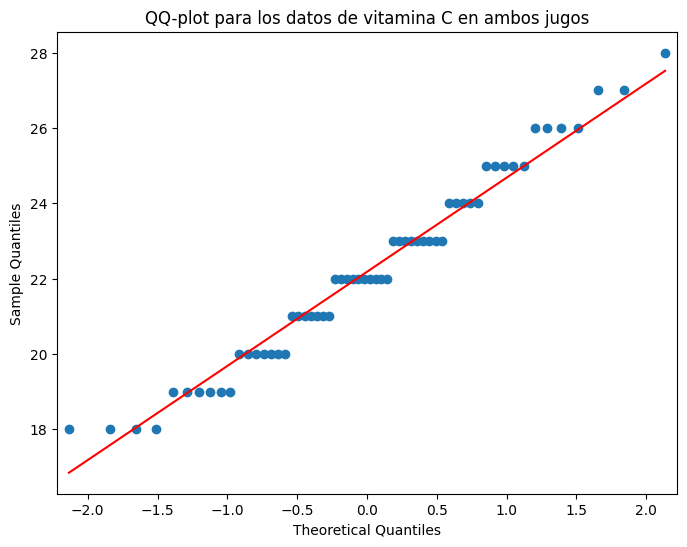

In [ ]:
# Crear QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(df.stack(), line='s', ax=ax)
ax.set_title("QQ-plot para los datos de vitamina C en ambos jugos")
plt.show()

Paso 3.
- Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales. Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.

In [ ]:
# Aplicar el test de Kolmogorov-Smirnov para ambos tipos de jugo
ks_statistic_a, p_value_a = kstest(df['Jugo A'], 'norm')
ks_statistic_b, p_value_b = kstest(df['Jugo B'], 'norm')

# Imprimir los resultados
print(f"Jugo A - KS Statistic: {ks_statistic_a}, p-value: {p_value_a}")
print(f"Jugo B - KS Statistic: {ks_statistic_b}, p-value: {p_value_b}")

Jugo A - KS Statistic: 1.0, p-value: 0.0
Jugo B - KS Statistic: 1.0, p-value: 0.0


Paso 4.
- En caso de que no sean normales considera que tienen una distribución t-student.


Como los p-valores del test de Kolmogorov-Smirnov son bajos (menores a un umbral de significancia), podemos considerar que los datos no siguen una distribución normal. En ese caso, podemos suponer que siguen una distribución t-Student.

Paso 5.
- Calcula el intervalo de confianza de acuerdo con la distribución de los datos y el nivel de confianza solicitado.

In [ ]:
# Nivel de confianza (99%)
nivel_confianza = 0.99

# Calcular los percentiles de la distribución t-Student
percentil_inf = (1 - nivel_confianza) / 2
percentil_sup = 1 - percentil_inf

# Calcular los intervalos de confianza utilizando la distribución t-Student
intervalo_confianza_a = t.interval(nivel_confianza, df=n_jugo_a-1, loc=np.mean(df['Jugo A']), scale=desviacion_estandar_jugo_a / np.sqrt(n_jugo_a))
intervalo_confianza_b = t.interval(nivel_confianza, df=n_jugo_b-1, loc=np.mean(df['Jugo B']), scale=desviacion_estandar_jugo_b / np.sqrt(n_jugo_b))

# Imprimir los intervalos de confianza
print(f"Intervalo de confianza al {nivel_confianza*100}% para Jugo A: {intervalo_confianza_a}")
print(f"Intervalo de confianza al {nivel_confianza*100}% para Jugo B: {intervalo_confianza_b}")

Intervalo de confianza al 99.0% para Jugo A: (22.936141535685323, 24.930525130981344)
Intervalo de confianza al 99.0% para Jugo B: (19.611360740938043, 21.255305925728624)
